# Term Deposit Marketing Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_csv('term_deposit_marketing_2020.csv')


In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [5]:
df.shape

(40000, 14)

In [6]:
df.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


In [7]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr']
y
['no' 'yes']


In [8]:
#finding missing values
features_na = [features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_na:
    print(features, np.round(df[feature].isnull().mean(),4), ' % missing values')
else: 
    print("No missing value found")


No missing value found


In [11]:
#finding features with one value
for column in df.columns:
    print(column,df[column].nunique())
    

age 70
job 12
marital 3
education 4
default 2
balance 6849
housing 2
loan 2
contact 3
day 31
month 11
duration 1535
campaign 48
y 2


In [12]:
#exploring the categorical features
categorical_features = [feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['y']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month']

In [13]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is job and number of categories are 12
The feature is marital and number of categories are 3
The feature is education and number of categories are 4
The feature is default and number of categories are 2
The feature is housing and number of categories are 2
The feature is loan and number of categories are 2
The feature is contact and number of categories are 3
The feature is month and number of categories are 11


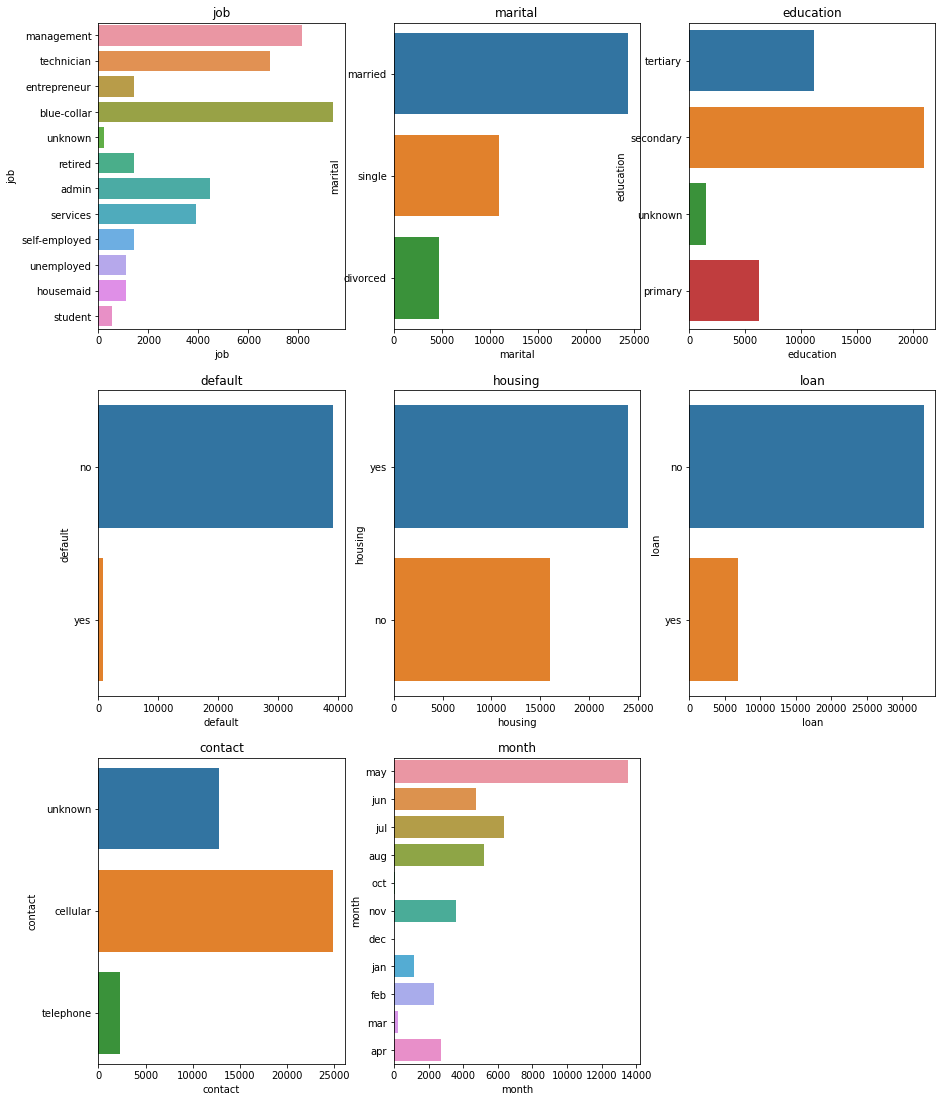

In [14]:
#checking count based on categorical features
plt.figure(figsize=(15,80),facecolor='white')
plotnumber=1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()


client with job type as blue-collar records are high in given dataset and student records are very less

client who married are high and divorced are less

client whoes education background is secondary are in high numbers

data in month of may is very high and it is very less in october and december

(My comprehensive comments are below)


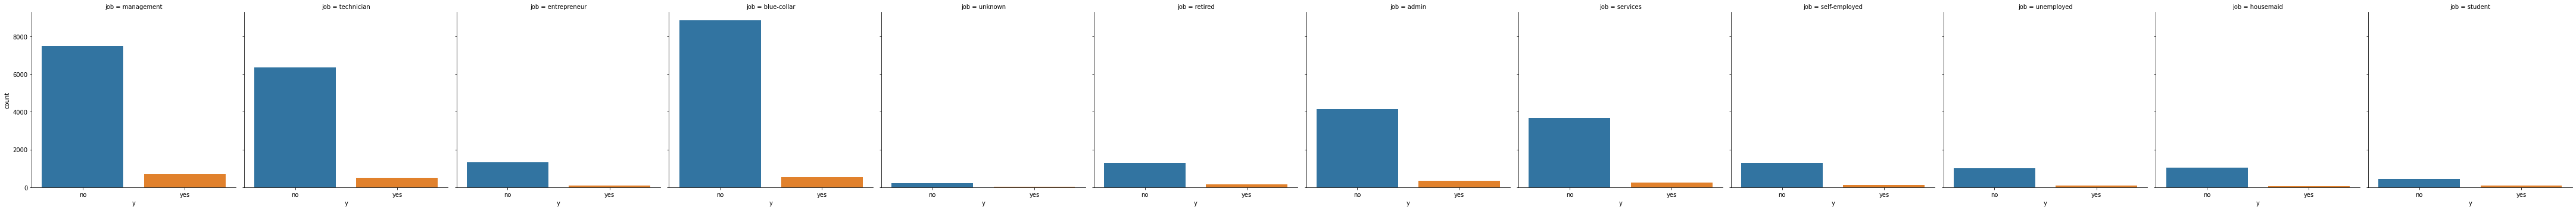

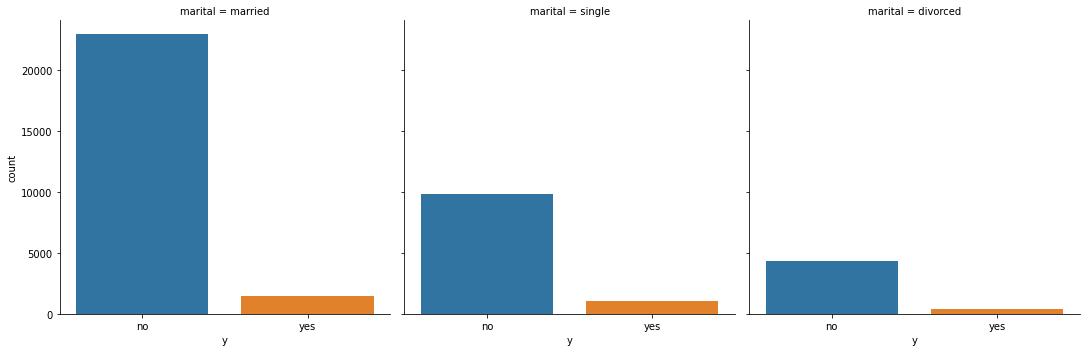

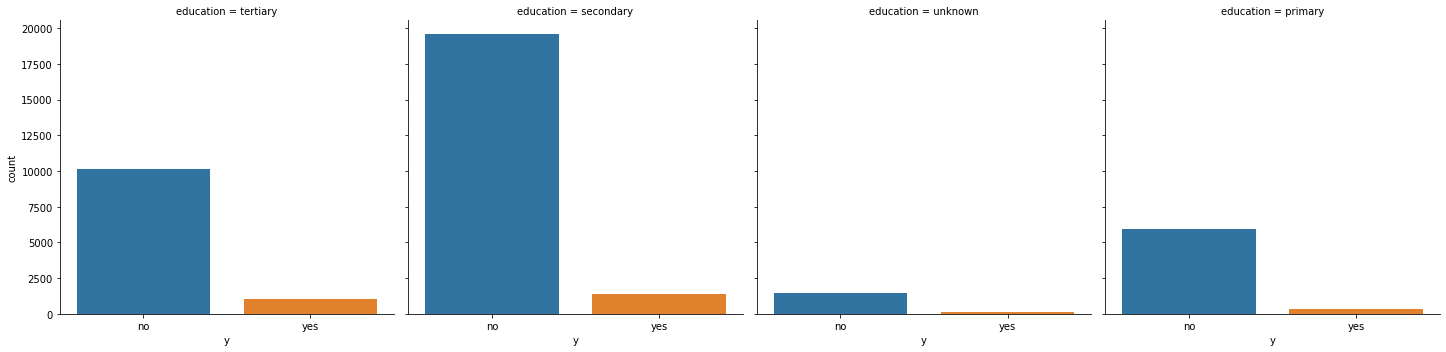

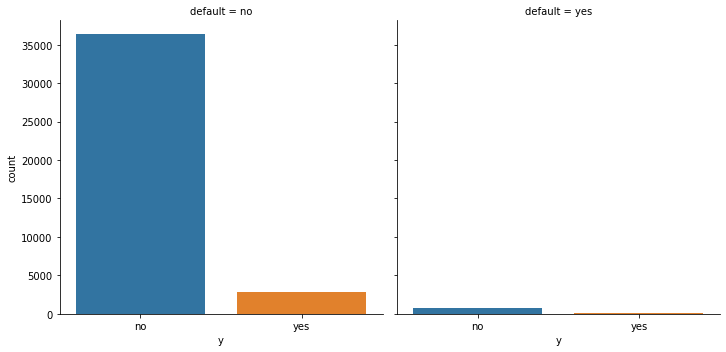

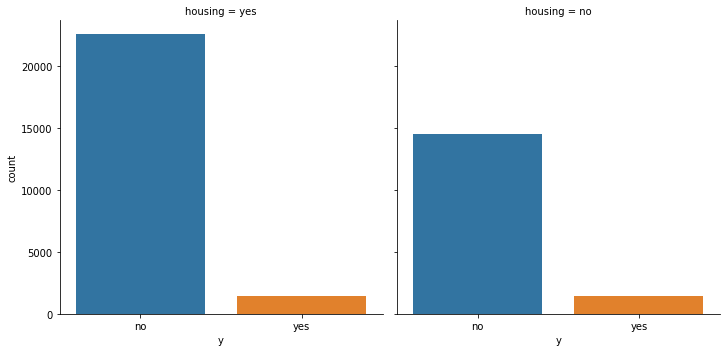

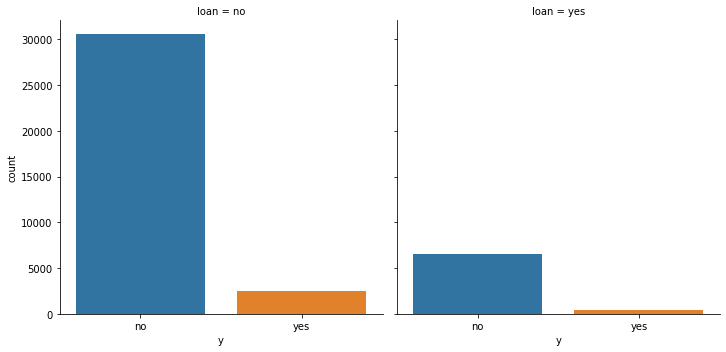

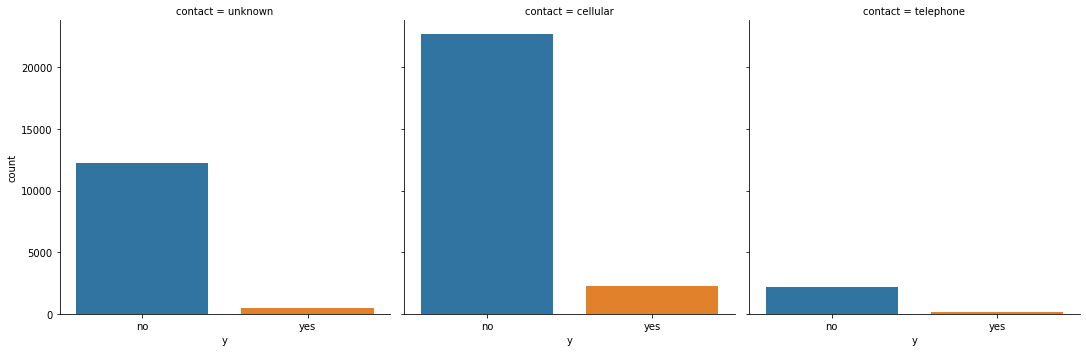

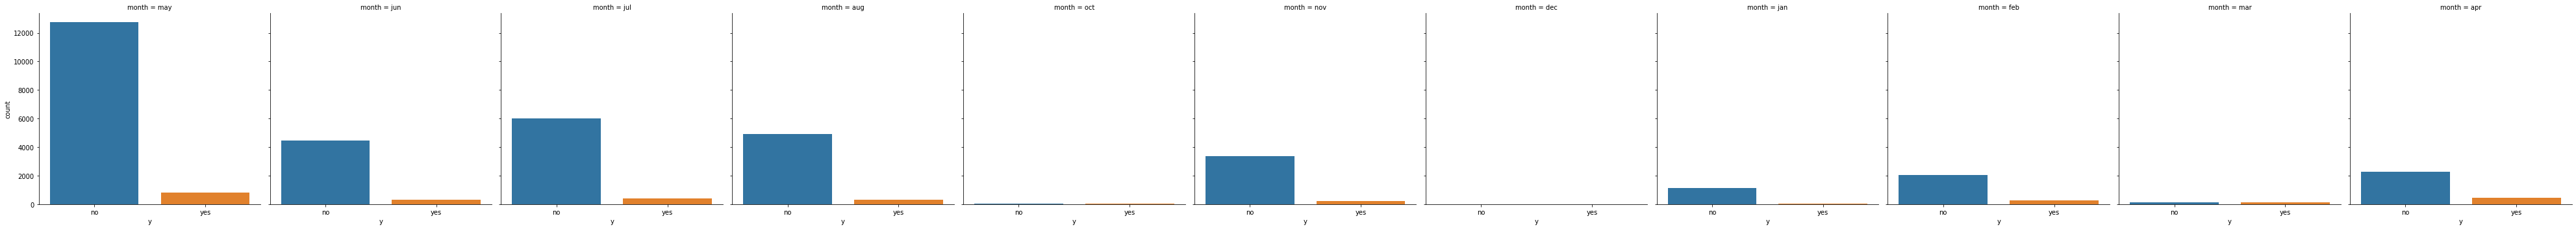

In [15]:
#checking target label split over categorical features
#Finding out the relationship between categorical variable and dependent variable
for categorical_feature in categorical_features:
    sns.catplot(x='y', col=categorical_feature, kind='count', data= df)
plt.show()


In [16]:
#Check target label split over categorical features and find the count
for categorical_feature in categorical_features:
    print(df.groupby(['y',categorical_feature]).size())

y    job          
no   admin            4132
     blue-collar      8848
     entrepreneur     1317
     housemaid        1034
     management       7490
     retired          1286
     self-employed    1302
     services         3672
     student           442
     technician       6355
     unemployed       1008
     unknown           218
yes  admin             351
     blue-collar       535
     entrepreneur       88
     housemaid          53
     management        676
     retired           151
     self-employed     112
     services          238
     student            82
     technician        497
     unemployed         96
     unknown            17
dtype: int64
y    marital 
no   divorced     4334
     married     22908
     single       9862
yes  divorced      391
     married      1478
     single       1027
dtype: int64
y    education
no   primary       5917
     secondary    19575
     tertiary     10177
     unknown       1435
yes  primary        353
     secondary     1

(My comprehensive comments are below)

In [17]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['y']))]
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  5


,age,balance,day,duration,campaign
0,58,2143,5,261,1
1,44,29,5,151,1
2,33,2,5,76,1
3,47,1506,5,92,1
4,33,1,5,198,1


there are 5 numerical features

In [19]:
#finding discrete numerical features
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


there is no Discrete Variables in give dataset

In [20]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['y']]
print("Continuous feature Count {}".format(len(continuous_features)))


Continuous feature Count 5


there are 5 continuous numerical features


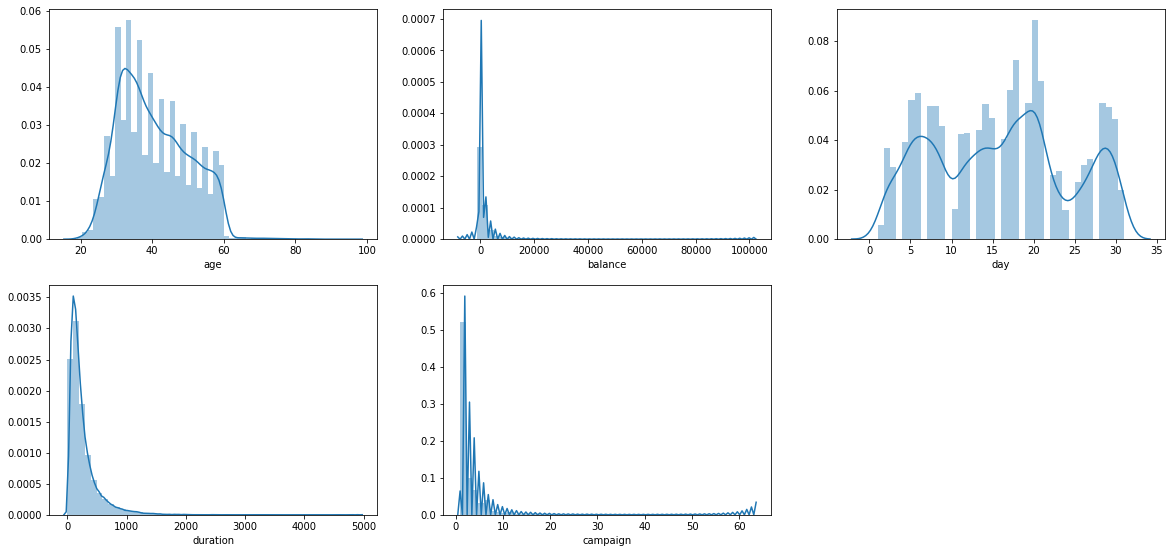

In [21]:
#plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

- It seems age and days distributed normally

- balance, duration and campaign heavely skewed towards left and seems to be have some outliers.


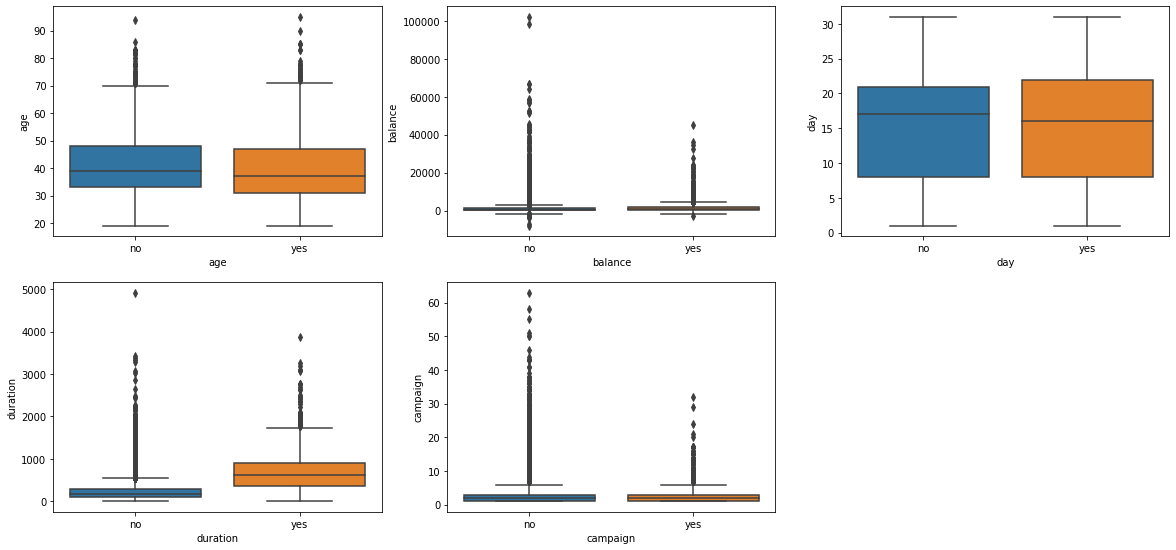

In [22]:
#boxplot to show target distribution with respect numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="y", y= df[feature], data=df)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()


client shows interest on deposit who had discussion for longer duration

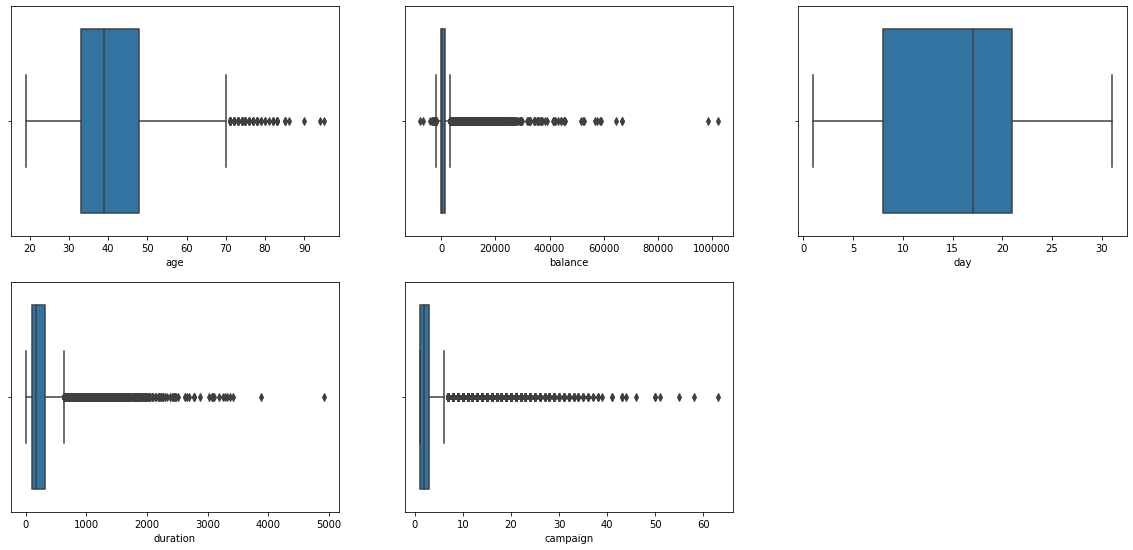

In [23]:
#boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

Age, balance, duration and compaign has some outliers


<AxesSubplot:>

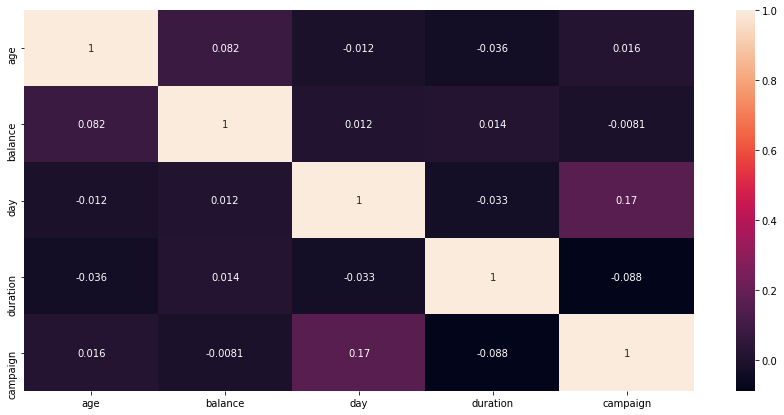

In [24]:
## Checking for correlation
cor_mat=df.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

it seems no feature is heavily correlated with other features

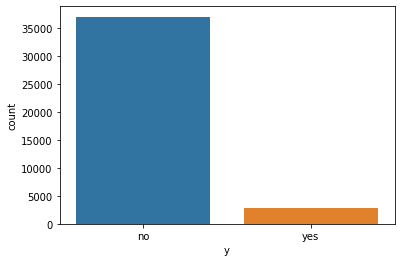

In [25]:
#total patient count based on cardio_results
sns.countplot(x='y',data=df)
plt.show()

In [26]:
df['y'].groupby(df['y']).count()



y
no     37104
yes     2896
Name: y, dtype: int64

given dataset seems to be balanced.


In [27]:
df2=df.copy()


In [28]:
df2.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [29]:
df2.shape


(40000, 14)

In [30]:
#default features does not play imp role
df2.groupby(['y','default']).size()

y    default
no   no         36344
     yes          760
yes  no          2847
     yes           49
dtype: int64

In [31]:
df2.drop(['default'],axis=1, inplace=True)


In [32]:
df2.groupby(['y','day']).size()

y    day
no   1       136
     2      1005
     3       794
     4      1066
     5      1578
            ... 
yes  27       84
     28       61
     29       49
     30      224
     31       26
Length: 62, dtype: int64

In [33]:
# drop day as it has -1 value for around 40%+ 
df2.drop(['day'],axis=1, inplace=True)

In [34]:
# remove outliers in feature age...
df2.groupby('age',sort=True)['age'].count()
# these can be ignored and values lies in between 18 to 95

age
19     12
20     22
21     39
22     71
23    149
     ... 
85      3
86      1
90      1
94      1
95      1
Name: age, Length: 70, dtype: int64

In [35]:
# remove outliers in feature balance...
df2.groupby(['y','balance'],sort=True)['balance'].count()
# these outlier should not be remove as balance goes high, client show interest on deposit


y    balance
no   -8019      1
     -6847      1
     -4057      1
     -3372      1
     -3313      1
               ..
yes   27624     1
      32685     1
      34646     1
      36252     1
      45248     1
Name: balance, Length: 8391, dtype: int64

In [36]:
# remove outliers in feature duration...
df2.groupby(['y','duration'],sort=True)['duration'].count()
# these outlier should not be remove as duration goes high, client show interest on deposit

y    duration
no   0           3
     1           1
     2           3
     3           4
     4           5
                ..
yes  3094        1
     3102        1
     3183        1
     3253        1
     3881        1
Name: duration, Length: 2505, dtype: int64

In [37]:
# remove outliers in feature campaign...
df2.groupby(['y','campaign'],sort=True)['campaign'].count()

y    campaign
no   1           13454
     2           10393
     3            4618
     4            3075
     5            1547
                 ...  
yes  20              1
     21              1
     24              1
     29              1
     32              1
Name: campaign, Length: 70, dtype: int64

In [38]:
df3 = df2[df2['campaign'] < 33]

In [39]:
df3.groupby(['y','campaign'],sort=True)['campaign'].count()


y    campaign
no   1           13454
     2           10393
     3            4618
     4            3075
     5            1547
     6            1160
     7             664
     8             501
     9             299
     10            250
     11            184
     12            150
     13            125
     14             89
     15             79
     16             76
     17             63
     18             51
     19             44
     20             42
     21             34
     22             23
     23             22
     24             19
     25             22
     26             13
     27             10
     28             16
     29             15
     30              8
     31             12
     32              8
yes  1            1264
     2             760
     3             352
     4             222
     5              95
     6              68
     7              35
     8              25
     9              19
     10             12
     11             

In [40]:
# remove outliers in feature previous...
df3.groupby(['y','duration'],sort=True)['duration'].count()

y    duration
no   0           3
     1           1
     2           3
     3           4
     4           5
                ..
yes  3094        1
     3102        1
     3183        1
     3253        1
     3881        1
Name: duration, Length: 2504, dtype: int64

In [41]:
df4 = df3[df3['duration'] < 31]


In [42]:
cat_columns = ['job', 'marital', 'education', 'contact', 'month']
for col in  cat_columns:
    df4 = pd.concat([df4.drop(col, axis=1),pd.get_dummies(df4[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)

In [43]:
bool_columns = ['housing', 'loan', 'y']
for col in  bool_columns:
    df4[col+'_new']=df4[col].apply(lambda x : 1 if x == 'yes' else 0)
    df4.drop(col, axis=1, inplace=True)

In [44]:
df4.head()

,age,balance,duration,campaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,month_feb,month_jan,month_jul,month_jun,month_may,month_nov,month_oct,housing_new,loan_new,y_new
42,60,104,22,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
57,47,306,13,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
82,42,690,20,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
107,34,61,21,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
177,34,51,19,2,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


### Split dataset 

In [45]:
X = df4.drop(['y_new'],axis=1)
y = df4['y_new']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [46]:
X_train.shape, y_train.shape

((1461, 33), (1461,))

In [47]:
X_test.shape, y_test.shape

((366, 33), (366,))

### Training the Model

In [48]:
from sklearn.svm import SVC
svc_model = SVC()

In [49]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score 
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
svc_model.fit(X_train,y_train)

SVC()

### Testing the Model

In [50]:
predictions = svc_model.predict(X_test)
print(confusion_matrix(y_test,predictions))

[[366]]


In [51]:
accuracy_score(y_test, predictions)

1.0

In [52]:
accuracy_score(y_train, svc_model.predict(X_train))

0.998631074606434

### and final

In [53]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       366

    accuracy                           1.00       366
   macro avg       1.00      1.00      1.00       366
weighted avg       1.00      1.00      1.00       366



Success Metric :

I hit %99 accuracy.

## Customer Segment Interpretations from Analysis Results for Marketing Strategies 


Customer Observations by Categorical Features

- Customers who are mostly blue collar, management and technician by profession said yes to term deposite.
Customers whose occupation type is unknown, student, housewife and unemployed mostly said no.

- In given dataset, married customers are high while singles are very low.

- Primary education is low while secondary education is high.

- Customers with home loans said yes to term deposite, but those without home loan mostly said no.

- Those who have personal loans do not choose a term deposit, while those who do not have personal loans lean towards term deposits.

- Customers with cellular communication type often said yes to term deposite.

- While the term deposit approval was very low for customers whose last contact month of the year was October, December and March. On the other hand, customers who were contacted last May approved the term deposit.

 - Client shows interest on deposit who had discussion for longer duration.
 
 - Younger customers show a little more interest in term deposit.